In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
Y = data.target
X = data.data

In [5]:
Y.shape,X.shape

((569,), (569, 30))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [7]:
type(X)

numpy.ndarray

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [9]:
X_train_norm.shape,X_test_norm.shape,Y_train.shape,Y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [10]:
X_train_norm_tensor = torch.from_numpy(X_train_norm.astype("float32"))
X_test_norm_tensor = torch.from_numpy(X_test_norm.astype("float32"))
Y_train_tensor = torch.from_numpy(Y_train.astype("float32")).reshape(-1,1)
Y_test_tensor = torch.from_numpy(Y_test.astype("float32")).reshape(-1,1)


In [11]:
X_train_norm_tensor.shape,X_test_norm_tensor.shape,Y_train_tensor.shape,Y_test_tensor.shape

(torch.Size([381, 30]),
 torch.Size([188, 30]),
 torch.Size([381, 1]),
 torch.Size([188, 1]))

In [12]:
#Build the model
N, D = X_train.shape
model = nn.Linear(D,1)

In [13]:
#optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [14]:
#training
epochs = 1500
losses_train = np.zeros(epochs)
losses_test = np.zeros(epochs)
acc_train = np.zeros(epochs)
acc_test =np.zeros(epochs)
for i in range(epochs):
  optimizer.zero_grad()

  outputs_train = model(X_train_norm_tensor)

  loss_train = criterion(outputs_train,Y_train_tensor)

  loss_train.backward()

  optimizer.step()

  losses_train[i] = loss_train.item()

  outputs_test = model(X_test_norm_tensor)

  loss_test = criterion(outputs_test, Y_test_tensor)

  losses_test[i] = (loss_test.item())
  
  outputs_train_1 = (outputs_train > 0)
  acc_training = np.mean(outputs_train_1.detach().numpy() == Y_train_tensor.numpy())

  acc_train[i] = (acc_training)


  outputs_test_1 = (outputs_test > 0)
  acc_testing = np.mean(outputs_test_1.detach().numpy() == Y_test_tensor.numpy())

  acc_test[i] = (acc_testing)


  print(f"epoch{i+1}/1000 -- training_loss - {loss_train}   test_loss - {loss_test}  traing_accuracy - {acc_training}  test_accuracy - {acc_testing}  ")

epoch1/1000 -- training_loss - 0.6531310677528381   test_loss - 0.6225337386131287  traing_accuracy - 0.6719160104986877  test_accuracy - 0.6808510638297872  
epoch2/1000 -- training_loss - 0.6472024917602539   test_loss - 0.6166306138038635  traing_accuracy - 0.6745406824146981  test_accuracy - 0.6808510638297872  
epoch3/1000 -- training_loss - 0.6413416862487793   test_loss - 0.6108080148696899  traing_accuracy - 0.6876640419947506  test_accuracy - 0.6968085106382979  
epoch4/1000 -- training_loss - 0.6355494260787964   test_loss - 0.605066180229187  traing_accuracy - 0.6902887139107612  test_accuracy - 0.7074468085106383  
epoch5/1000 -- training_loss - 0.6298264265060425   test_loss - 0.5994053483009338  traing_accuracy - 0.6955380577427821  test_accuracy - 0.7180851063829787  
epoch6/1000 -- training_loss - 0.6241732239723206   test_loss - 0.5938255786895752  traing_accuracy - 0.7060367454068242  test_accuracy - 0.7340425531914894  
epoch7/1000 -- training_loss - 0.61859041452407

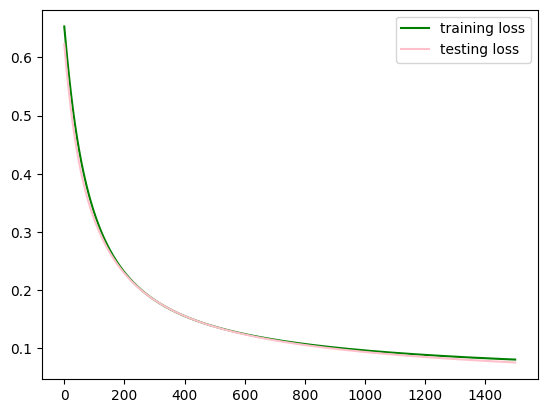

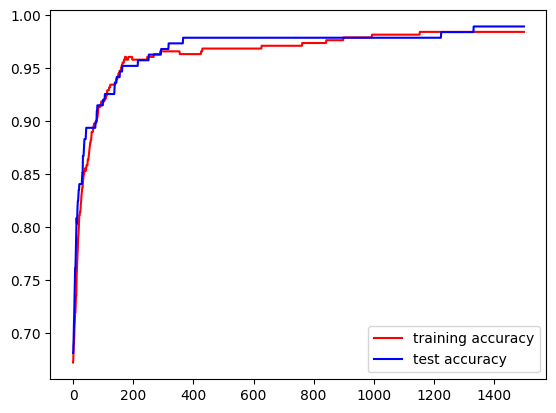

In [15]:
plt.plot(losses_train,label = "training loss", c = "g")
plt.plot(losses_test,label = "testing loss", c = "pink")
plt.legend()
plt.show()

plt.plot(acc_train, label = "training accuracy",c= "r")
plt.plot(acc_test, label = "test accuracy",c="b")
plt.legend()
plt.show()